# Time Series Day 2

In [1]:
!pip install pandas_datareader
!pip install yfinance

import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime

In [2]:
data=yf.Ticker('TSLA')

In [3]:
data.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, a

In [4]:
df=data.history(period='60mo')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-24 00:00:00-05:00,20.900000,20.966667,19.680000,19.692667,83398500,0.0,0.0
2018-12-26 00:00:00-05:00,20.000000,21.798000,19.606001,21.739332,122446500,0.0,0.0
2018-12-27 00:00:00-05:00,21.322666,21.478001,20.100000,21.075333,128626500,0.0,0.0
2018-12-28 00:00:00-05:00,21.540001,22.416000,21.227333,22.257999,149085000,0.0,0.0
2018-12-31 00:00:00-05:00,22.519333,22.614000,21.684000,22.186666,94534500,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-12-24 00:00:00-05:00 to 2023-12-21 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


<Axes: xlabel='Date'>

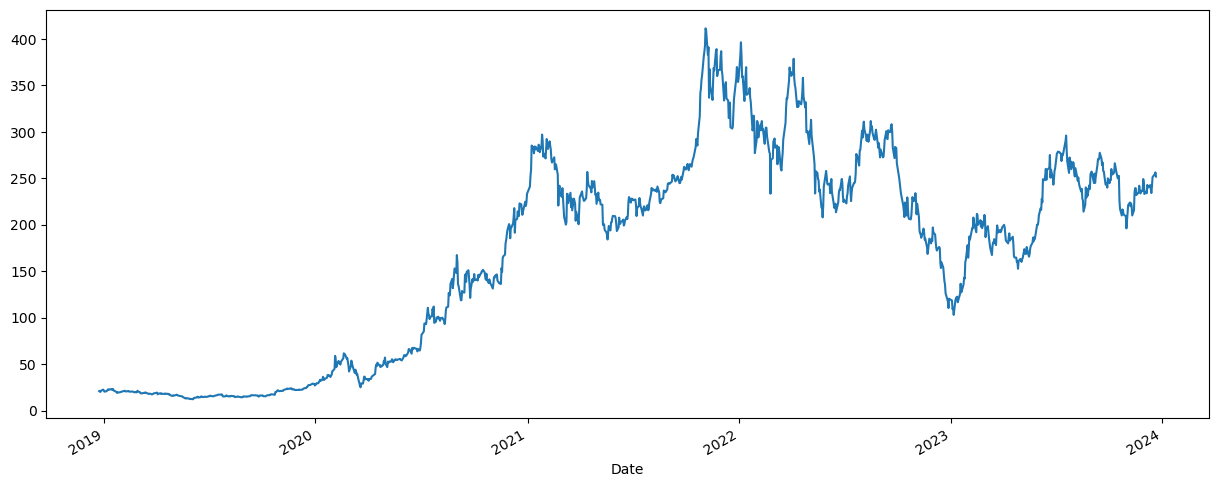

In [7]:
## Simple Moving Average: Smoothens the graph
df['Open'].plot(figsize=(15,6))

In [8]:
df['Open:10D Rolling']=df['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

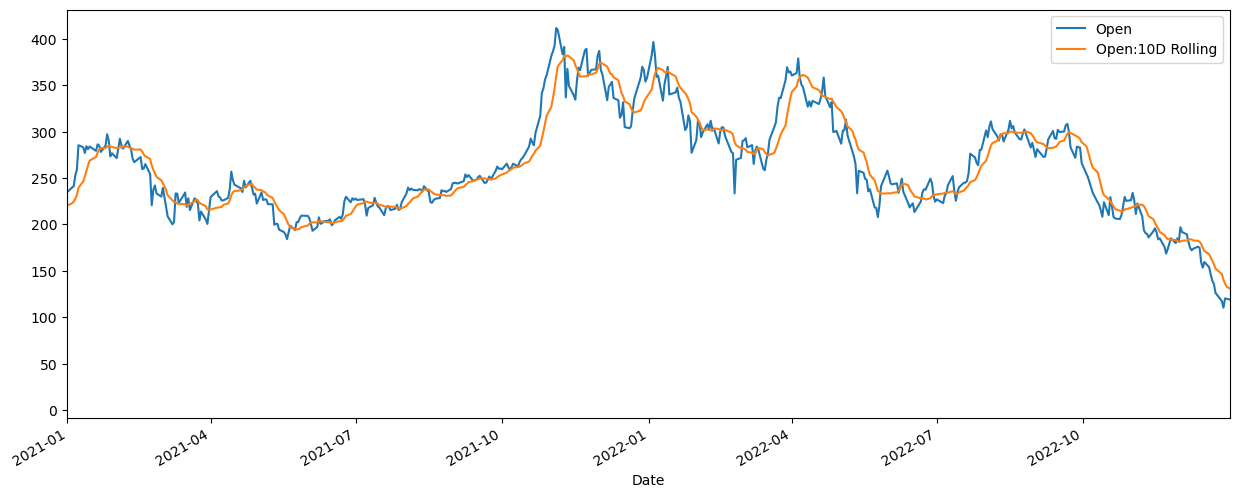

In [9]:
df[['Open','Open:10D Rolling']].plot(xlim=['2021-01-01','2023-01-01'],figsize=(15,6))

This method is used in stock market for making decisions such as buying and selling of stocks

In [10]:
import matplotlib.pyplot as plt

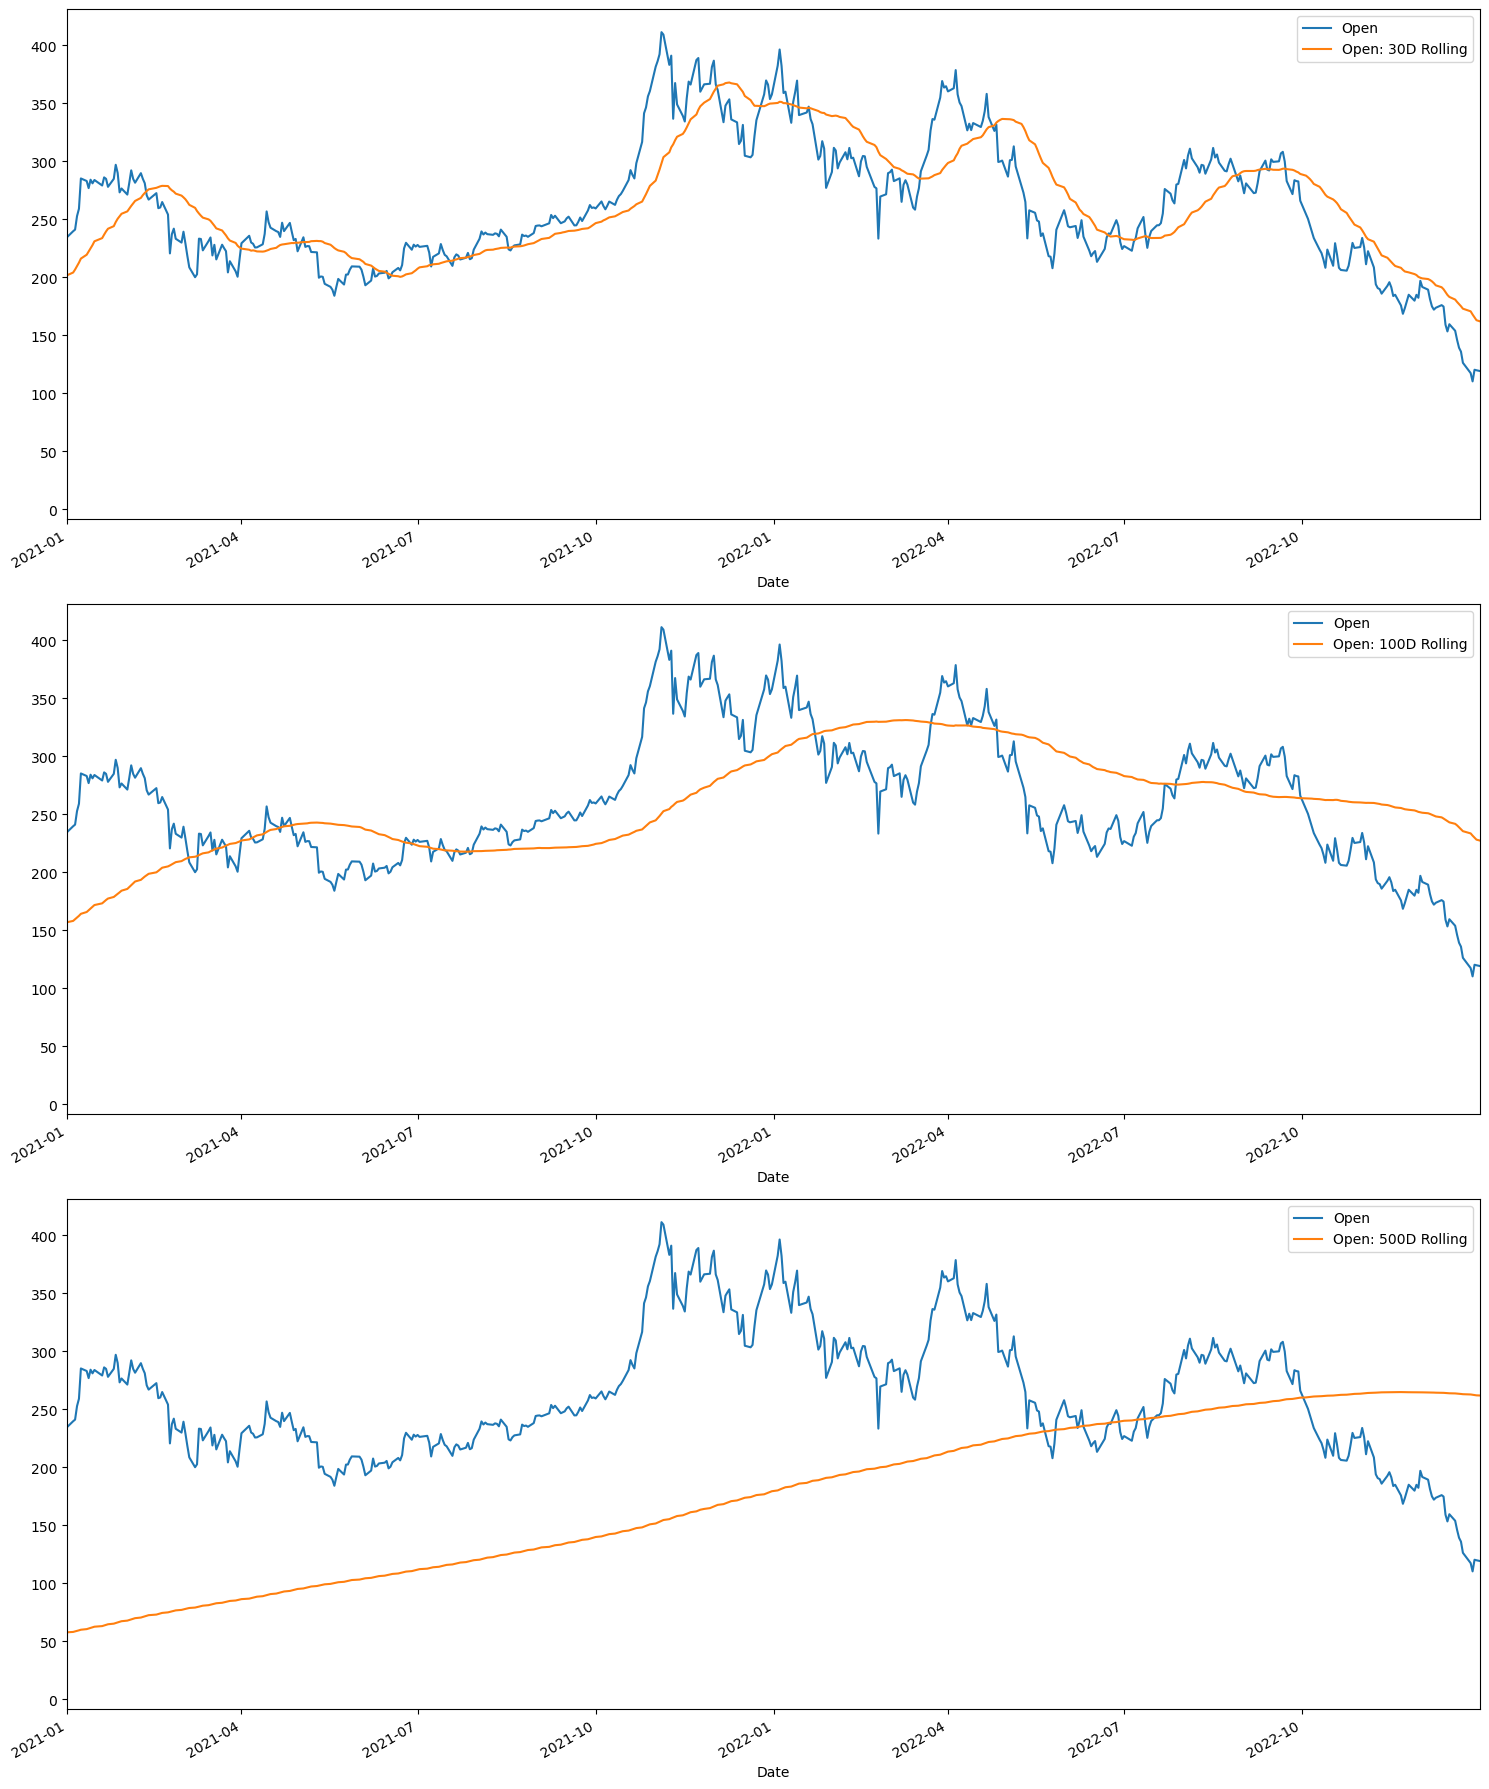

In [11]:
## comparing different window sizes

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(15, 18))

df['Open: 30D Rolling'] = df['Open'].rolling(30).mean()
df[['Open', 'Open: 30D Rolling']].plot(xlim=['2021-01-01', '2023-01-01'], ax=axes[0])

df['Open: 100D Rolling'] = df['Open'].rolling(100).mean()
df[['Open', 'Open: 100D Rolling']].plot(xlim=['2021-01-01', '2023-01-01'], ax=axes[1])

df['Open: 500D Rolling'] = df['Open'].rolling(500).mean()
df[['Open', 'Open: 500D Rolling']].plot(xlim=['2021-01-01', '2023-01-01'], ax=axes[2])

plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

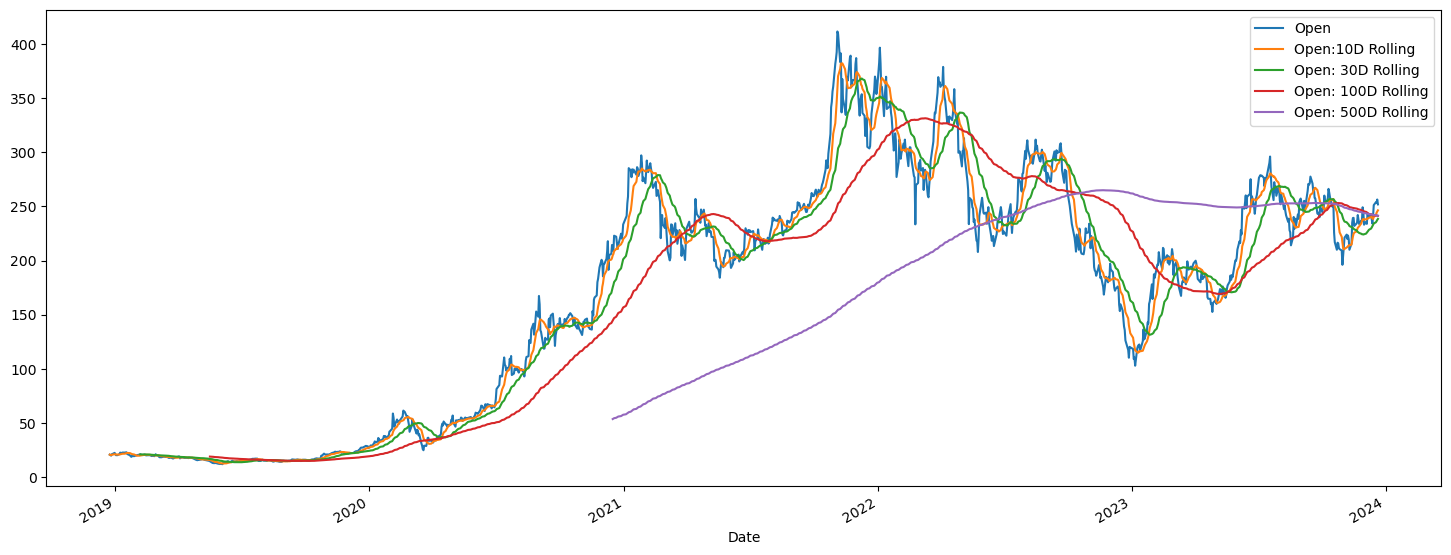

In [12]:
df[['Open','Open:10D Rolling', 'Open: 30D Rolling', 'Open: 100D Rolling','Open: 500D Rolling']].plot(figsize=(18,7))

<Axes: xlabel='Date'>

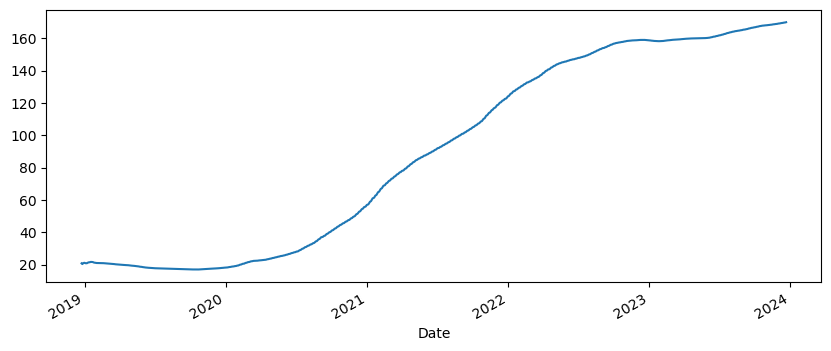

In [13]:
## Expanding Function - Cummulative Moving Average
df['Open'].expanding().mean().plot(figsize=(10,4))

In [14]:
## Exponentially Weighted Moving Average
## Smopothening- 0.1
df['EWMA 0.1']=df['Open'].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='Date'>

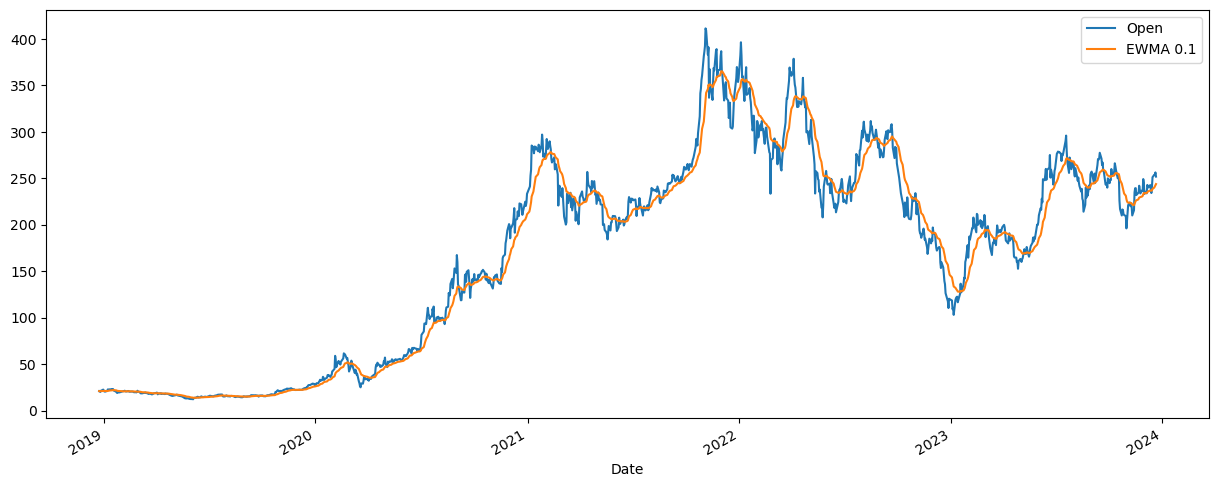

In [15]:
## Let's plot it
df[['Open','EWMA 0.1']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

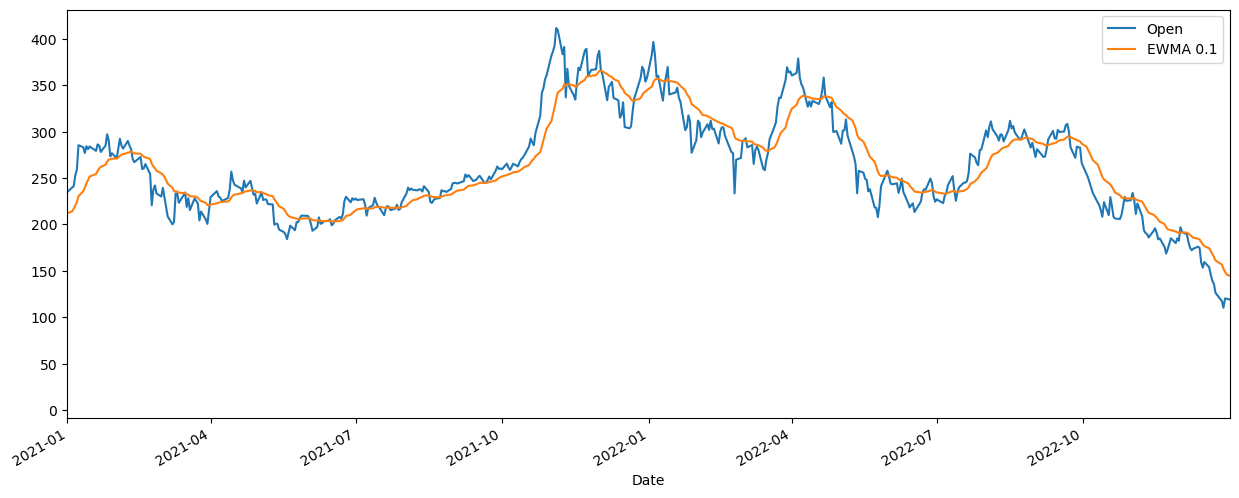

In [17]:
## Plotting with xlim for better view
df[['Open','EWMA 0.1']].plot(xlim=['2021-01-01','2023-01-01'],figsize=(15,6))

We can see that the smoothening is without any lags. It is better than Simple Moving Average

<Axes: xlabel='Date'>

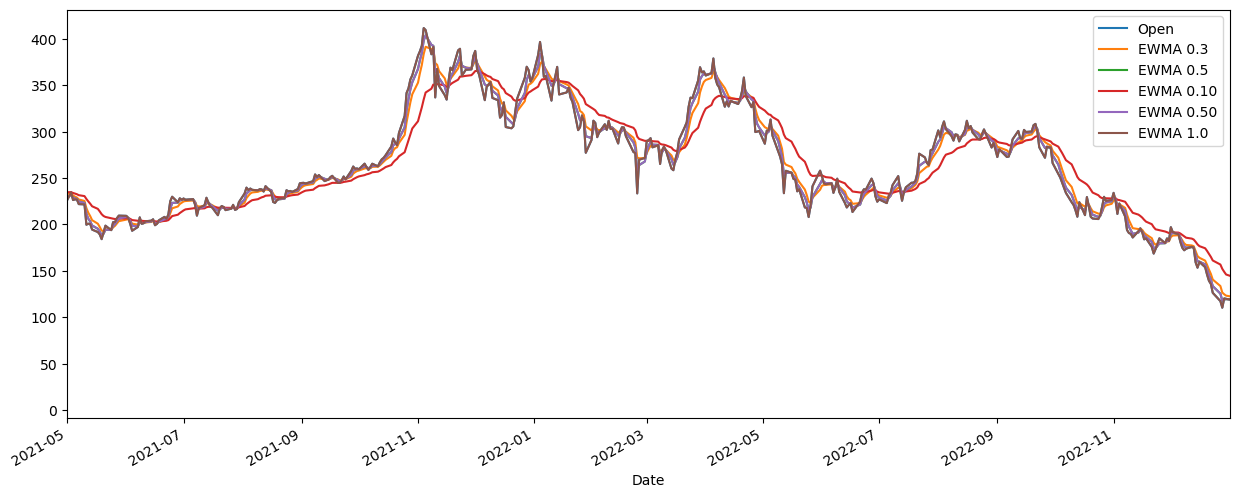

In [24]:
## Let's compare with different alpha values

df['EWMA 0.3']=df['Open'].ewm(alpha=0.3, adjust=False).mean()
df['EWMA 0.5']=df['Open'].ewm(alpha=0.5, adjust=False).mean()
df['EWMA 0.10']=df['Open'].ewm(alpha=0.10, adjust=False).mean()
df['EWMA 0.50']=df['Open'].ewm(alpha=0.50, adjust=False).mean()
df['EWMA 1.0']=df['Open'].ewm(alpha=1.0, adjust=False).mean()

df[['Open','EWMA 0.3','EWMA 0.5','EWMA 0.10','EWMA 0.50','EWMA 1.0']].plot(xlim=['2021-05-01','2023-01-01'],figsize=((15,6)))

Exponentially Weighted Moving Average focuses more on the recent data

## The End